In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

from binaryclassifier.analyzer import Analyzer
from data.utils import prepare_titanic, encode_features

# Read and Encode Titanic Dataset

In [2]:
df_train, df_test, y_train, y_test = prepare_titanic()

df_train = encode_features(df_train)
df_test = encode_features(df_test)

Download or read from disk.
Convert to pandas.DataFrame
Partition into Train and Test
    Test size = 0.3
    random_state = 123


In [3]:
df_train.head()

,age,cabin,fare,sex,pclass,sibsp,ticket,embarked_0,embarked_1,embarked_2,embarked_3
164,2.0,1.0,27.900000,1.0,2.0,3.0,347088.0,0.0,0.0,1.0,0.0
974,58.0,0.0,29.700001,0.0,0.0,0.0,11771.0,1.0,0.0,0.0,0.0
759,39.0,0.0,55.900002,1.0,0.0,1.0,13507.0,0.0,0.0,1.0,0.0
613,46.0,0.0,79.199997,0.0,0.0,0.0,17593.0,1.0,0.0,0.0,0.0
848,-1.0,1.0,15.500000,0.0,2.0,1.0,370365.0,0.0,1.0,0.0,0.0


# Normalize Data

Here we manually encode rather than using scikit-learn so we can save the mean and standard deviation of the training dataset for later use

In [4]:
# Normalize features using training data
norm_df = df_train.describe().transpose()

def norm(x, norm_df):
    return (x - norm_df['mean']) / norm_df['std']

df_train_sc = norm(df_train, norm_df)
df_test_sc = norm(df_test, norm_df)

In [5]:
df_train_sc.head()

,age,cabin,fare,sex,pclass,sibsp,ticket,embarked_0,embarked_1,embarked_2,embarked_3
164,-1.202463,0.531605,-0.103996,1.357463,0.829160,2.380600,0.256429,-0.524848,-0.319648,0.669982,-0.033041
974,1.933049,-1.879041,-0.071045,-0.735864,-1.570557,-0.493692,-0.419738,1.903235,-0.319648,-1.490947,-0.033041
759,0.869215,-1.879041,0.408574,1.357463,-1.570557,0.464405,-0.416237,-0.524848,-0.319648,0.669982,-0.033041
613,1.261154,-1.879041,0.835106,-0.735864,-1.570557,-0.493692,-0.407997,1.903235,-0.319648,-1.490947,-0.033041
848,-1.370437,0.531605,-0.330992,-0.735864,0.829160,0.464405,0.303367,-0.524848,3.125028,-1.490947,-0.033041


# Train a Baseline Classifier

Using `GradientBoostingClassifier()` with its sensible defaults.

In [6]:
estimator = GradientBoostingClassifier(random_state=123)

estimator.fit(df_train_sc, y_train)

scores = estimator.predict_proba(df_test_sc)[:,1]
preds = np.where(scores > 0.5, 1, 0)

In [7]:
print('AUC:       {:6.4f}'.format(metrics.roc_auc_score(y_test, scores)))
print('Accuracy:  {:6.4f}'.format(metrics.accuracy_score(y_test, preds)))
print('Recall:    {:6.4f}'.format(metrics.recall_score(y_test, preds)))
print('Precision: {:6.4f}'.format(metrics.precision_score(y_test, preds)))
print('F1 Score:  {:6.4f}'.format(metrics.f1_score(y_test, preds)))

AUC:       0.8696
Accuracy:  0.8015
Recall:    0.6564
Precision: 0.8295
F1 Score:  0.7329


# Use Analyzer class to produce plots

In [8]:
analyzer = Analyzer(preds=preds, scores=scores, y_true=y_test.reset_index(drop=True))

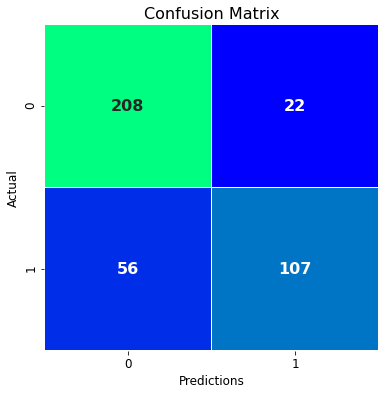

In [9]:
analyzer.plot_confusion_matrix()

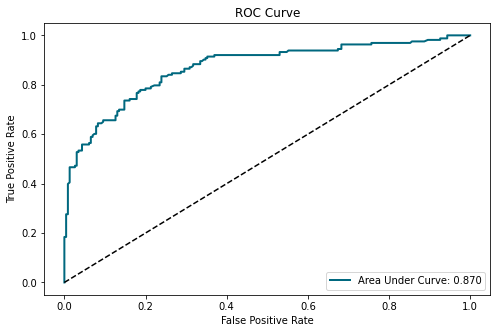

In [10]:
analyzer.plot_roc_curve()

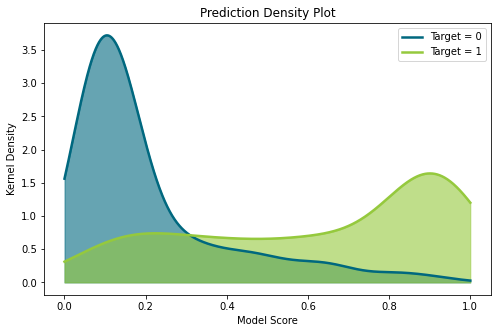

In [11]:
analyzer.plot_prediction_density()

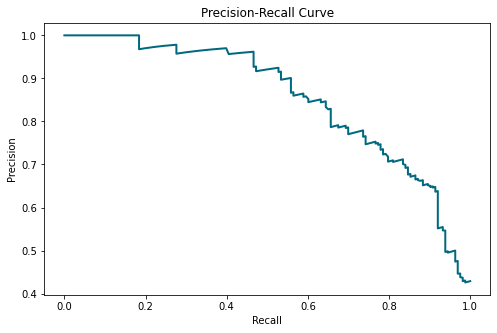

In [12]:
analyzer.plot_precision_recall()

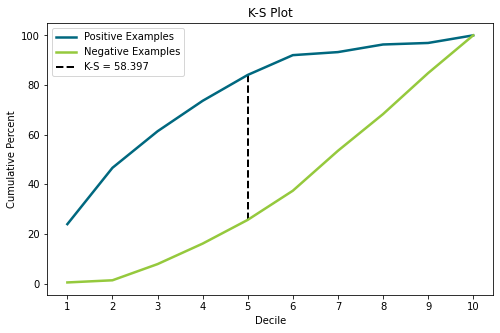

In [13]:
analyzer.plot_ks()

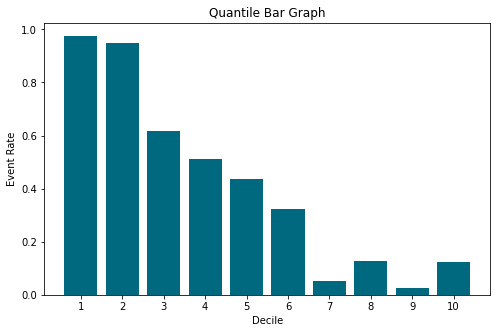

In [14]:
analyzer.plot_quantiles()